In [6]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import geopandas
from shapely.geometry import Point
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
crime17 = pd.read_csv('https://raw.githubusercontent.com/orlandott/Predictive_Policing/master/sf_incidents16.csv')
crime16 = pd.read_csv('https://raw.githubusercontent.com/orlandott/Predictive_Policing/master/sf_incidents17.csv')

In [9]:
crime16.head(3)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150333505,WARRANTS,WARRANT ARREST,Wednesday,04/19/2017,21:29,MISSION,"ARREST, BOOKED",24TH ST / BRYANT ST,-122.409132,37.752797,"(37.752796998558445, -122.40913193948903)",15033350563010
1,141091334,BURGLARY,"BURGLARY OF STORE, FORCIBLE ENTRY",Wednesday,03/08/2017,14:28,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.40340479147905)",14109133405051
2,160913272,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Tuesday,09/12/2017,09:00,MISSION,UNFOUNDED,2700 Block of 16TH ST,-122.414223,37.765325,"(37.76532508532617, -122.414222704763)",16091327264070


In [10]:
crime17.head(3)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,160147073,VEHICLE THEFT,STOLEN MOTORCYCLE,Thursday,02/18/2016 12:00:00 AM,22:00,NORTHERN,UNFOUNDED,BROADWAY ST / GOUGH ST,-122.426703,37.795316,"(37.7953163162613, -122.426702502506)",16014707307023


Find the zip codes for each incident given the latitude and longitude

In [11]:
crime16['geometry'] = crime16.apply(lambda row: Point(row['X'], row['Y']), axis=1)

In [12]:
geo_police_data = geopandas.GeoDataFrame(crime16, geometry='geometry')
geo_police_data.crs = {'init': 'epsg:4326'}

/usr/local/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [13]:
sf = geopandas.read_file('https://raw.githubusercontent.com/orlandott/Predictive_Policing/master/zipcodes_geo.json')
sf.crs = {'init': 'epsg:4326'}
sf = sf.set_geometry('geometry')

/usr/local/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [14]:
!pip install -q condacolab -q

import condacolab

condacolab.install()

✨🍰✨ Everything looks OK!


In [15]:
!conda install geopandas

import geopandas as gpd

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

# All requested packages already installed.



In [16]:
crime16 = gpd.tools.sjoin(geo_police_data, sf, how='left')

Find which zip codes, day of week, and hour have the most crimes

In [17]:
day_time_zip_16 = crime16[['Date', 'DayOfWeek', 'Time', 'zip']]

In [18]:
day_time_zip_16.loc[:, 'Date'] = pd.to_datetime(day_time_zip_16['Date'])

day_time_zip_16.loc[:, 'Hour'] = pd.to_datetime(day_time_zip_16['Time'])
day_time_zip_16.loc[:, 'Hour'] = day_time_zip_16.Hour.apply(lambda x: x.hour)

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [19]:
day_time_zip_16.head()

,Date,DayOfWeek,Time,zip,Hour
0,2017-04-19,Wednesday,21:29,94110,21
1,2017-03-08,Wednesday,14:28,94103,14
2,2017-09-12,Tuesday,09:00,94110,9
3,2017-06-01,Thursday,08:51,94112,8
4,2017-04-19,Wednesday,21:29,94110,21


Remove data from November and December because I don't have that data for 2017 to compare it to

In [20]:
day_time_zip_16_final = day_time_zip_16[day_time_zip_16.Date.dt.month < 11]

Combine all the crimes into hours and days and zip codes

In [21]:
day_time_zip_16_final = day_time_zip_16[['DayOfWeek', 'zip', 'Hour']]

In [22]:
day_time_zip_16_final.loc[:, 'Crimes'] = 1

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [23]:
hour_totals_16 = day_time_zip_16_final.groupby(['DayOfWeek', 'zip', 'Hour']).sum().reset_index()

In [24]:
hour_totals_16.sort_values('Crimes', ascending = False).head()

,DayOfWeek,zip,Hour,Crimes
2465,Thursday,94103,18,227
2466,Thursday,94103,19,220
41,Friday,94103,17,213
3067,Tuesday,94103,18,213
44,Friday,94103,20,201


Create dummy variables to start doing analysis

In [25]:
hour_totals_16 = hour_totals_16[['Crimes', 'Hour', 'DayOfWeek', 'zip']]

In [26]:
totals_dummies_16 = pd.get_dummies(hour_totals_16)

In [27]:
X_16 = totals_dummies_16.iloc[:, 1:]
y_16 = totals_dummies_16.iloc[:, 0]

Linear Regression with 2016 data

In [29]:
import statsmodels.regression.linear_model as sm

In [30]:
linear_regression = sm.OLS(y_16, X_16)
results = linear_regression.fit()

In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Crimes   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     372.8
Date:                Mon, 06 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:25:24   Log-Likelihood:                -17573.
No. Observations:                4230   AIC:                         3.521e+04
Df Residuals:                    4197   BIC:                         3.542e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Hour                    1.2007      0.035     34.802      0.000       1.133       1.268
DayOfWeek_Friday       12.4239      0.689     18.023      0.000      11.072      13.775
DayOfWeek_Monday       10.6984      0.689     15.517      0.000       9.347      12.050
DayOfWeek_Saturday     11.8963      0.688     17.290      0.000      10.547      13.245
DayOfWeek_Sunday        9.8878      0.687     14.397      0.000       8.541      11.234
DayOfWeek_Thursday     11.1056      0.689     16.108      0.000       9.754      12.457
DayOfWeek_Tuesday      10.4829      0.692     15.145      0.000       9.126      11.840
DayOfWeek_Wednesday    10.9756      0.689     15.930      0.000       9.625      12.326
zip_94102              44.1661      1.175     37.581      0.000      41.862      46.470
zip_94103              91.1423      1.175     77.552      0.000      88.838      93.446
zip_94104             -21.7172      1.264    -17.178      0.000     -24.196     -19.239
zip_94105             -10.6136      1.175     -9.031      0.000     -12.918      -8.310
zip_94107               8.4995      1.175      7.232      0.000       6.195      10.804
zip_94108              -5.7935      1.179     -4.915      0.000      -8.105      -3.482
zip_94109              28.7316      1.175     24.447      0.000      26.428      31.036
zip_94110              44.3209      1.175     37.712      0.000      42.017      46.625
zip_94111             -10.8286      1.179     -9.186      0.000     -13.140      -8.518
zip_94112               5.3566      1.175      4.558      0.000       3.053       7.661
zip_94114               1.4459      1.175      1.230      0.219      -0.858       3.750
zip_94115               4.3507      1.175      3.702      0.000       2.047       6.655
zip_94116              -9.2508      1.182     -7.824      0.000     -11.569      -6.933
zip_94117               3.3090      1.175      2.816      0.005       1.005       5.613
zip_94118              -4.8372      1.179     -4.104      0.000      -7.148      -2.526
zip_94121              -8.5841      1.186     -7.239      0.000     -10.909      -6.259
zip_94122              -1.8339      1.175     -1.560      0.119      -4.138       0.470
zip_94123              -6.6732      1.175     -5.678      0.000      -8.977      -4.369
zip_94124              14.3268      1.175     12.191      0.000      12.023      16.631
zip_94127             -19.0043      1.201    -15.829      0.000     -21.358     -16.651
zip_94130             -23.7804      1.494    -15.918      0.000     -26.709     -20.852
zip_94131             -14.3452      1.190    -12.060      0.000     -16.677     -12.013
zip_94132              -9.0239      1.179     -7.656      0.000     -11.335      -6.713
zip_94133               6.9161      1.175      5.885      0.000       4.612       9.220
zip

Test it with new 2017 data

Find the zip codes for each incident given the latitude and longitude

In [32]:
crime17['geometry'] = crime17.apply(lambda row: Point(row['X'], row['Y']), axis=1)

In [33]:
geo_police_data = geopandas.GeoDataFrame(crime17, geometry='geometry')
geo_police_data.crs = {'init': 'epsg:4326'}

/usr/local/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [35]:
sf = geopandas.read_file('https://raw.githubusercontent.com/orlandott/Predictive_Policing/master/zipcodes_geo.json')
sf.crs = {'init': 'epsg:4326'}
sf = sf.set_geometry('geometry')

/usr/local/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [36]:
crime17 = gpd.tools.sjoin(geo_police_data, sf, how='left')

Find which zip codes, day of week, and hour have the most crimes

In [37]:
day_time_zip_17 = crime17[['DayOfWeek', 'Time', 'zip']]

In [38]:
day_time_zip_17['Hour'] = pd.to_datetime(day_time_zip_17['Time'])
day_time_zip_17['Hour'] = day_time_zip_17.Hour.apply(lambda x: x.hour)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Combine all the crimes into hours and days and zip codes

In [39]:
day_time_zip_17 = day_time_zip_17[['DayOfWeek', 'zip', 'Hour']]

In [40]:
day_time_zip_17['Crimes'] = 1

In [41]:
hour_totals_17 = day_time_zip_17.groupby(['DayOfWeek', 'zip', 'Hour']).count().reset_index()

In [42]:
hour_totals_17.sort_values('Crimes', ascending = False).head()

,DayOfWeek,zip,Hour,Crimes
41,Friday,94103,17,265
650,Monday,94103,17,258
2482,Thursday,94103,18,257
3699,Wednesday,94103,18,257
42,Friday,94103,18,253


Create dummy variables to start doing analysis

In [43]:
hour_totals_17 = hour_totals_17[['Crimes', 'Hour', 'DayOfWeek', 'zip']]

In [44]:
totals_dummies_17 = pd.get_dummies(hour_totals_17)

In [45]:
X_17 = totals_dummies_17.iloc[:, 1:]
y_17 = totals_dummies_17.iloc[:, 0]

Testing the different models

Linear Regression

In [46]:
linear_regression = LinearRegression()
linear_regression.fit(X_16,y_16)
linear_regression.score(X_17, y_17)

0.6932512654661083

Random Forest

In [47]:
rf = RandomForestRegressor()
rf.fit(X_16, y_16)
rf.score(X_17,y_17)

0.8622797648108718

In [48]:
list(zip(X_16.columns, rf.feature_importances_))

[('Hour', 0.26304598979272015),
 ('DayOfWeek_Friday', 0.007171022777810932),
 ('DayOfWeek_Monday', 0.004651946479828277),
 ('DayOfWeek_Saturday', 0.009215558514418937),
 ('DayOfWeek_Sunday', 0.008722975661071816),
 ('DayOfWeek_Thursday', 0.00502659905628364),
 ('DayOfWeek_Tuesday', 0.004516648918352077),
 ('DayOfWeek_Wednesday', 0.004405554562729137),
 ('zip_94102', 0.09332257005568759),
 ('zip_94103', 0.34516419247016517),
 ('zip_94104', 0.009717973403998442),
 ('zip_94105', 0.0013839033791336463),
 ('zip_94107', 0.010093211756233272),
 ('zip_94108', 0.0008156477399485836),
 ('zip_94109', 0.04937418397676023),
 ('zip_94110', 0.09142816853031945),
 ('zip_94111', 0.0007951803841648792),
 ('zip_94112', 0.007475231356186101),
 ('zip_94114', 0.0038350140620893062),
 ('zip_94115', 0.006696302070734035),
 ('zip_94116', 0.0008358875838793166),
 ('zip_94117', 0.006260627611523984),
 ('zip_94118', 0.0008917162227224825),
 ('zip_94121', 0.0006349973329777431),
 ('zip_94122', 0.002075276157304772

KNN

In [49]:
knn = KNeighborsRegressor()
knn.fit(X_16, y_16)
knn.score(X_17,y_17)

0.6622766098379327

SVM

In [50]:
svm = SVR()
svm.fit(X_16, y_16)
svm.score(X_17,y_17)

-0.029567402122195663

XGBoost

In [51]:
xgb = XGBRegressor()
xgb.fit(X_16, y_16)
xgb.score(X_17,y_17)

[22:35:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.80944233735405

MLP Regressor

In [52]:
mlp = MLPRegressor(hidden_layer_sizes = (100,100,100,100), random_state=444)
mlp.fit(X_16,y_16)

MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100), random_state=444)

In [53]:
mlp.score(X_17, y_17)

0.8324168277203203

Combine predictions and actual results into one dataframe

In [54]:
mlp_predicts = mlp.predict(X_16)

In [55]:
xgb_predicts = xgb.predict(X_16)

In [56]:
hour_totals_17['Predicted_mlp'] = pd.Series(mlp_predicts)
hour_totals_17['Predicted_xgb'] = pd.Series(xgb_predicts)

Divide by 365 to get the number of crime incidents each day

In [57]:
hour_totals_17['Crimes'] = hour_totals_17['Crimes']/365
hour_totals_17['Predicted_mlp'] = hour_totals_17['Predicted_mlp']/365
hour_totals_17['Predicted_xgb'] = hour_totals_17['Predicted_xgb']/365

In [58]:
hour_totals_17 = np.round(hour_totals_17,2)

In [59]:
hour_totals_17.to_json("https://raw.githubusercontent.com/orlandott/Predictive_Policing/master/crime_predictions.json", orient='records', double_precision=2)

Create a quick Chloropleth map as a sanity check

In [60]:
chloropleth_data = hour_totals_17.merge(sf)
chloropleth_data = geopandas.GeoDataFrame(chloropleth_data, geometry='geometry')
chloropleth_data.crs = {'init': 'epsg:4326'}

/usr/local/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


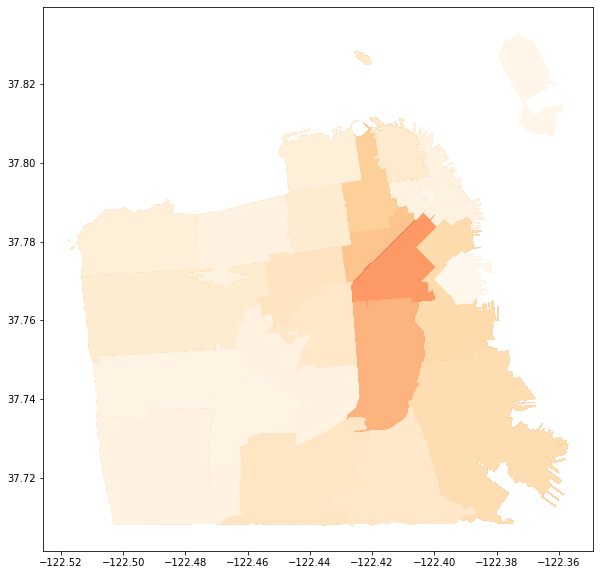

In [61]:
chloropleth_data.plot(column='Crimes', cmap='OrRd', figsize=(13,10))